In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

In [2]:
%store -r df

In [3]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Hierarchical Clustering

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [5]:
x1 = df.iloc[:,[1,3]]
x1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


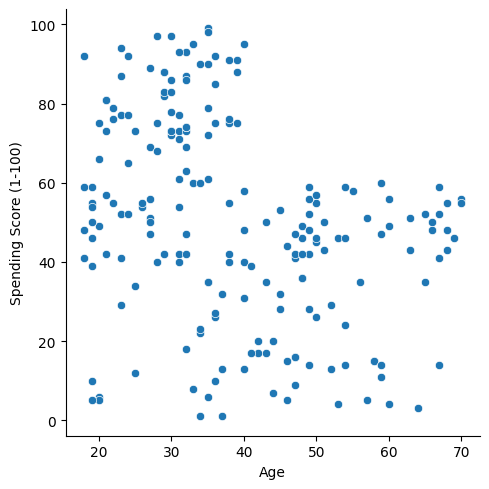

In [6]:
sns.relplot(x='Age', y="Spending Score (1-100)", data=x1)


In [7]:
#identify optimal number of clusters using Dendogram
#A dendrogram is a tree-like diagram that records the sequences of merges or splits.

# plt.title("dendogram")
# dendogram = shc.dendrogram(shc.linkage(x1, method = "ward"))


In [8]:

import numpy as np
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# There are four methods for combining clusters in agglomerative approach.
# Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them

hc_ward = linkage(y=x1, method='ward')
hc_complete = linkage(y=x1, method='complete')
hc_avg = linkage(y=x1, method='average')
hc_single = linkage(y=x1, method='single')



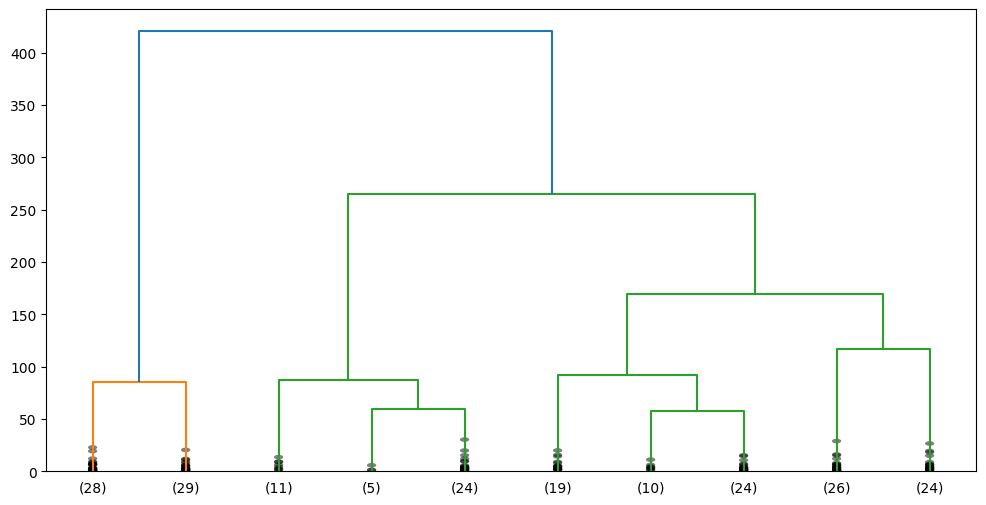

In [9]:
plt.figure(figsize=(12,6))
dendrogram=shc.dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

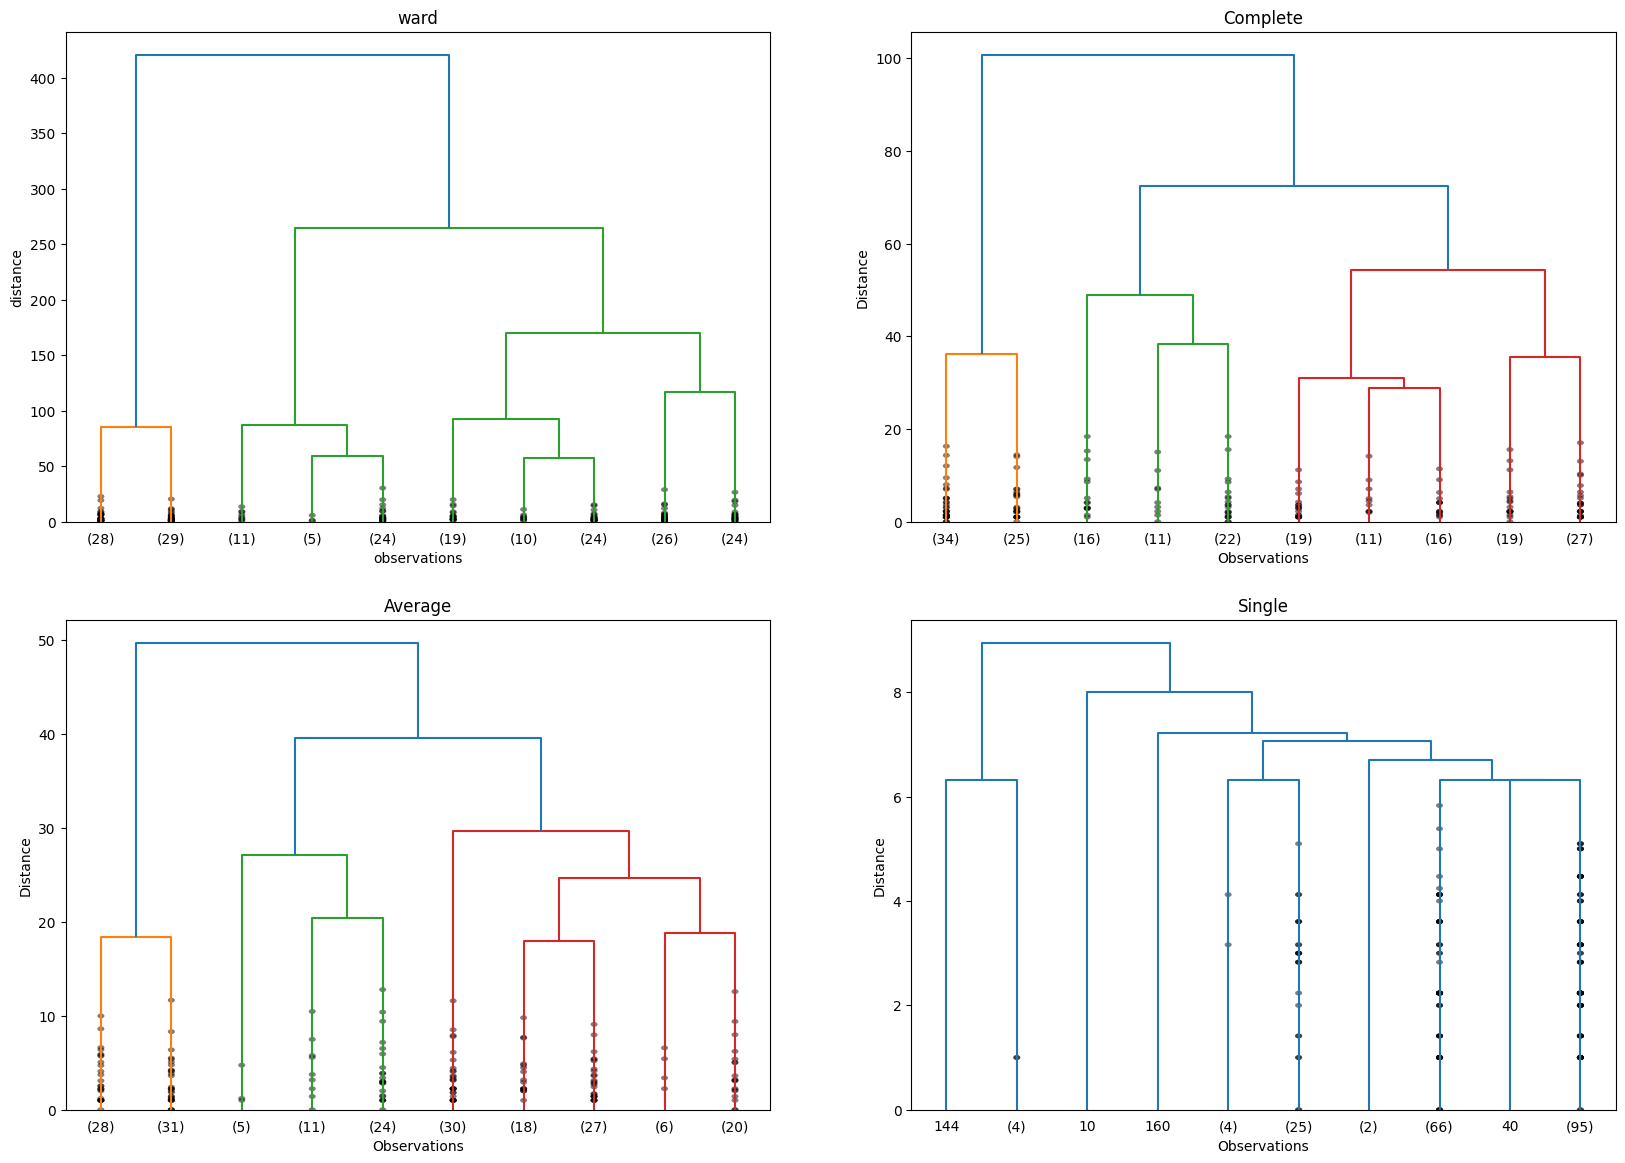

In [10]:
plt.figure(figsize=(20, 14))

plt.subplot(221)
plt.title('ward')
plt.xlabel('observations')
plt.ylabel('distance')
dendogram = shc.dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)


plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_avg, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True,  leaf_font_size = 10)


# dendogram = shc.dendrogram(shc.linkage(x2, method = "ward"))
# plt.title('Dendrogram')

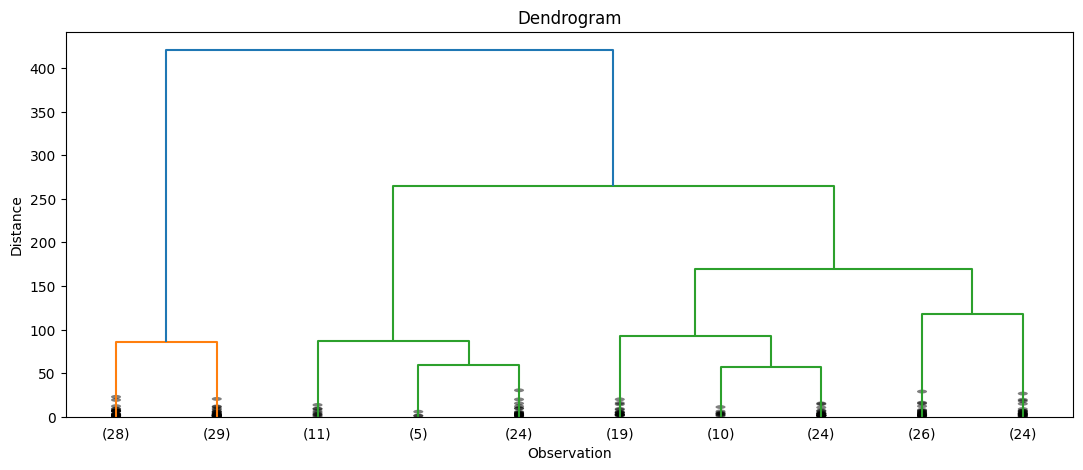

In [11]:
plt.figure(figsize=(13, 5))
plt.title('Dendrogram')
plt.xlabel('Observation')
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_ward, truncate_mode='lastp', p=10,  show_contracted = True, leaf_font_size=10 )


In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,11)
for k in K:
    agg_model = AgglomerativeClustering(n_clusters=k)
    agg_model.fit_predict(x1)
    print(f'The silhouette Score of {k} clusters: {silhouette_score(x1, agg_model.labels_)}')


The silhouette Score of 2 clusters: 0.4549465643222241
The silhouette Score of 3 clusters: 0.4411791686353356
The silhouette Score of 4 clusters: 0.4602496389565028
The silhouette Score of 5 clusters: 0.40374071753059787
The silhouette Score of 6 clusters: 0.4125958704145705
The silhouette Score of 7 clusters: 0.4158977524079244
The silhouette Score of 8 clusters: 0.3883688959732531
The silhouette Score of 9 clusters: 0.3948151533262091
The silhouette Score of 10 clusters: 0.3876666104778445


In [13]:
#As we can see high silhouette Score of cluster 4 is 0.46 

#### Age and Spending Score- x1

In [14]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster = model.fit_predict(x1)
cluster

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [15]:
x1["cluster"] = cluster
x1["cluster"]
x1.head()

C:\Users\hessa\AppData\Local\Temp\ipykernel_21144\1351358533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["cluster"] = cluster


,Age,Spending Score (1-100),cluster
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


In [16]:
from sklearn.metrics import silhouette_score 
silhouette_score(x1, cluster)

0.46147471339798707

## Clustering based on Annual Income and Spending Score- x2

In [30]:
%store -r x2
x2

,Annual Income (k$),Spending Score (1-100),kmeans_cluster2
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


Text(0.5, 1.0, 'Dendrogram')

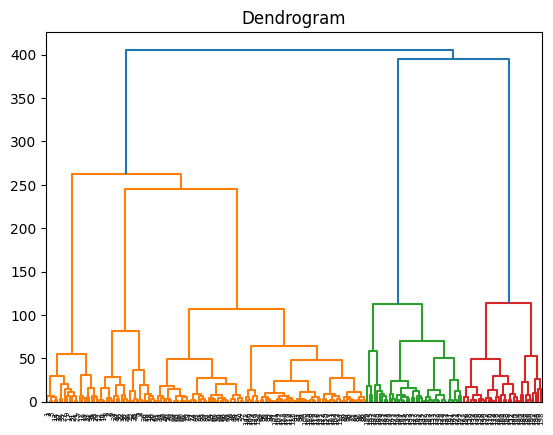

In [18]:
dendogram = shc.dendrogram(shc.linkage(x2, method = "ward"))
plt.title('Dendrogram')

In [19]:
hc_ward = linkage(y=x2, method='ward')
hc_complete = linkage(y=x2, method='complete')
hc_avg = linkage(y=x2, method='average')
hc_single = linkage(y=x2, method='single')


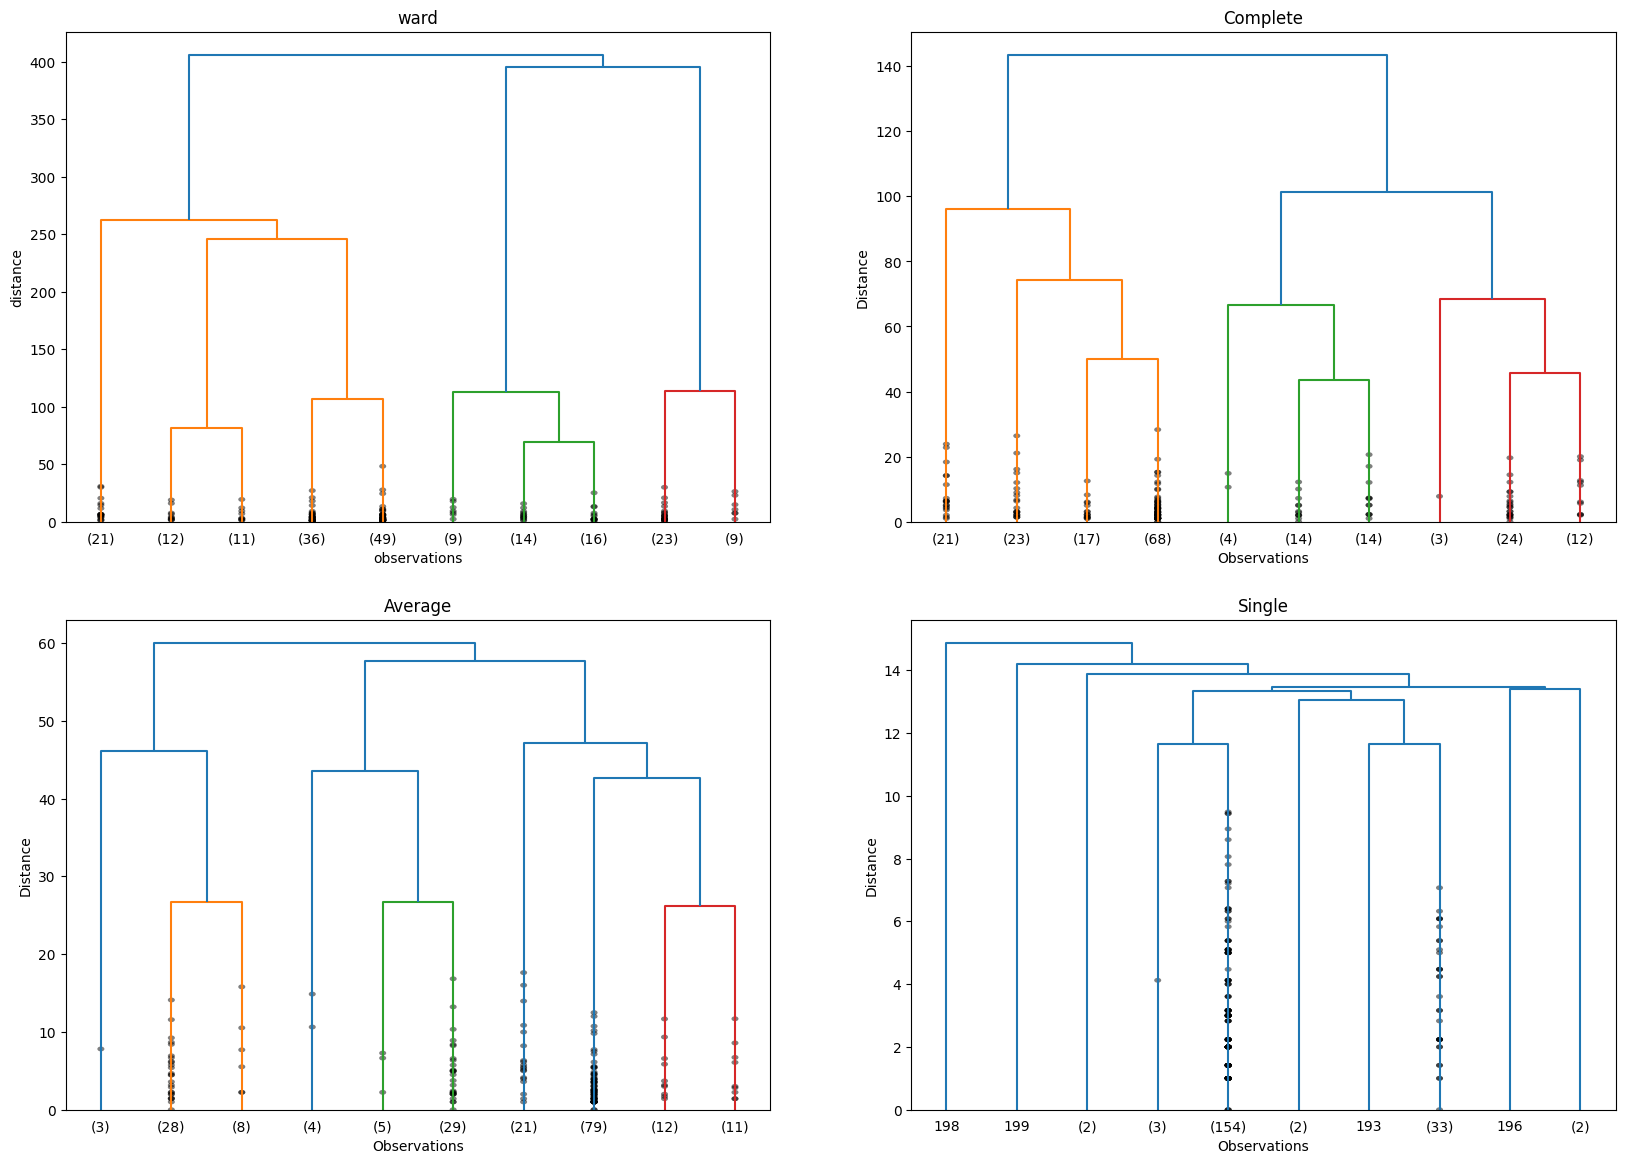

In [20]:
plt.figure(figsize=(20, 14))

plt.subplot(221)
plt.title('ward')
plt.xlabel('observations')
plt.ylabel('distance')
dendogram = shc.dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)


plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_avg, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True,  leaf_font_size = 10)


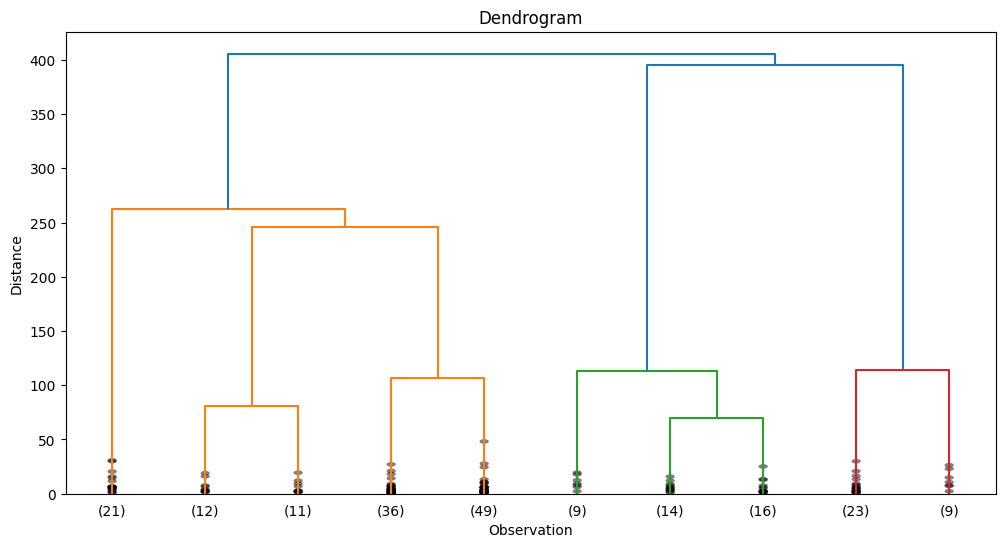

In [21]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
plt.xlabel('Observation')
plt.ylabel("Distance")
dendogram = shc.dendrogram(hc_ward, truncate_mode='lastp', p=10,  show_contracted = True, leaf_font_size=10 )


In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,11)
for k in K:
    agg_model = AgglomerativeClustering(n_clusters=k)
    agg_model.fit_predict(x2)
    print(f'The silhouette Score of {k} clusters: {silhouette_score(x2, agg_model.labels_)}')


The silhouette Score of 2 clusters: 0.36706444723912895
The silhouette Score of 3 clusters: 0.4618340266628975
The silhouette Score of 4 clusters: 0.4916598193892782
The silhouette Score of 5 clusters: 0.5529945955148897
The silhouette Score of 6 clusters: 0.5380208285578872
The silhouette Score of 7 clusters: 0.519904611908887
The silhouette Score of 8 clusters: 0.4326286245782246
The silhouette Score of 9 clusters: 0.43892545672004507
The silhouette Score of 10 clusters: 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Annual Income and Spending Score- x2

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(x2)


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [24]:
cl2 = cluster.fit_predict(x2)
x2['hr_cluster_x2'] = cl2
x2.head()
# silhouette_score(x2, cl2)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\hessa\AppData\Local\Temp\ipykernel_21144\469928289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['hr_cluster_x2'] = cl2


,Annual Income (k$),Spending Score (1-100),hr_cluster_x2
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

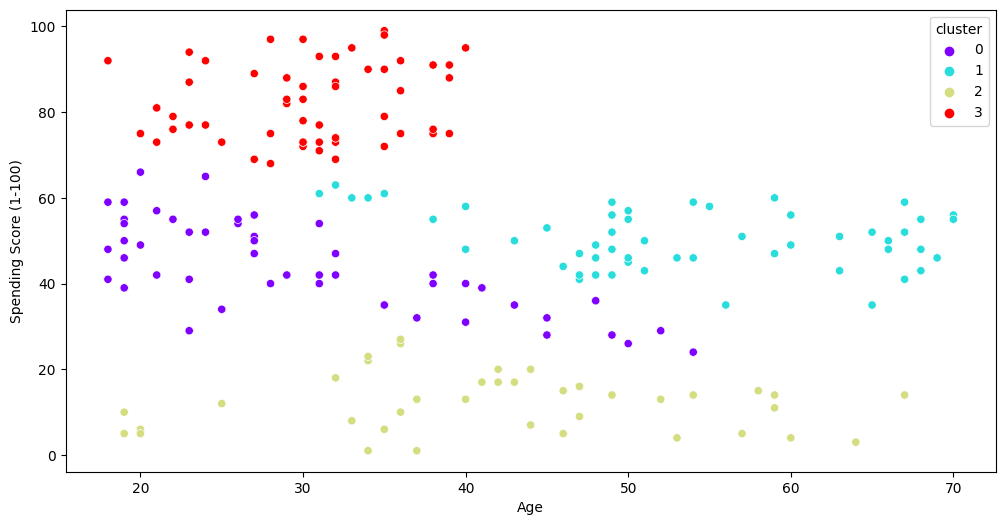

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=x1, hue='cluster', palette='rainbow')

#### Annual Income and Spending Score- x2

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

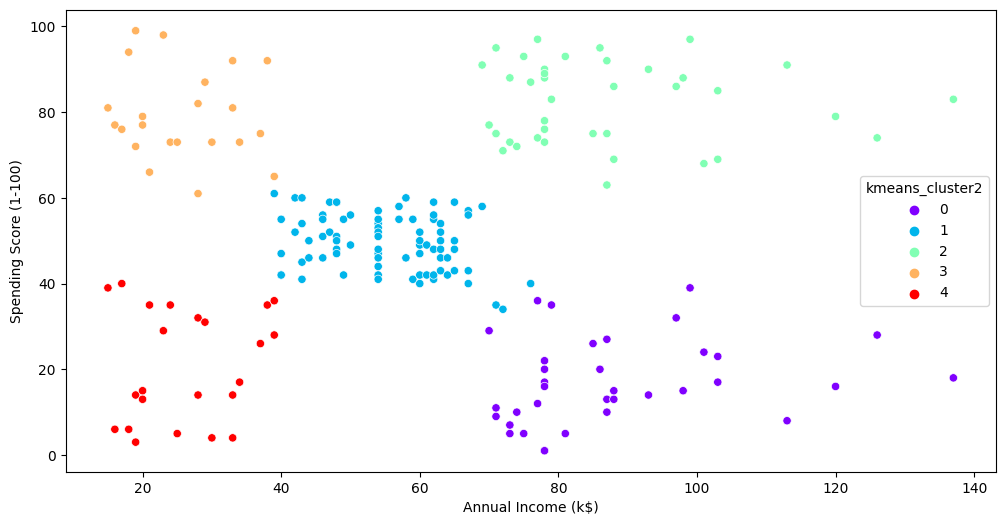

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=x2, hue='kmeans_cluster2', palette='rainbow')

In [ ]:
# I decide to choose kmeans cluster values ,because Kmeans is better separated than hiraarichal